**PROJECT:** "Fraud prevention and detection"

**GROUP N°:** 8 - *MAPA, Connecting Ideas*

**MEMBERS:** Mariana Uro - Pablo Tamayo

**OBJECTIVE:** The project’s objetive is predict frauds over distance of financial transactions​.

**DESCRIPTION OF THE VARIABLES:**

    distance_from_home: the distance from home to where the transaction took place
    distance_from_last_transaction: the distance from the last transaction 
    ratio_to_median_purchase_price: relationship between of the purchase Price and the average purchase price
    repeat_retailer: the transaction from the retailer.
    used_chip: is the transaction that was made using chip (credit card).
    used_pin_number: is the transaction that was made using PIN number.
    online_order: the transaction is an online order.
    fraud: ¿Is the transaction a fraud?

**SETUP DEL PROYECTO**

**IMPORTACIÓN DE LIBRERÍAS**

In [ ]:
# Numeric, scientific and data science libreries
#============================================================================================================
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sidetable

#Visualization
#============================================================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Sklearn imports
#============================================================================================================

# Data Preprocessing
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer

# Data preparation for training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Evaluation metrics and visualization
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Models from Sklearn and XGBOOST
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.neural_network
from sklearn. ensemble import StackingClassifier
from sklearn. ensemble import RandomForestClassifier
import xgboost as xgb

#Feature Importance
from sklearn.inspection import permutation_importance

**IMPORTACIÓN Y ANÁLISIS DEL DATASET**

In [ ]:
# Importamos el dataset
#============================================================================================================

df_fraude_creditcard = pd.read_csv('card_transdata.csv')
df_fraude_creditcard.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Calculamos el tamaño del dataset
#============================================================================================================

df_fraude_creditcard.shape

(1000000, 8)

In [ ]:
# Mostramos el nombre de las variables del dataset en forma de lista
#============================================================================================================

df_fraude_creditcard.columns.values.tolist()

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order',
 'fraud']

In [ ]:
# Calculamos la cantidad de datos por variable
#============================================================================================================

df_fraude_creditcard.count()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                   1000000
used_chip                         1000000
used_pin_number                   1000000
online_order                      1000000
fraud                             1000000
dtype: int64

<AxesSubplot:>

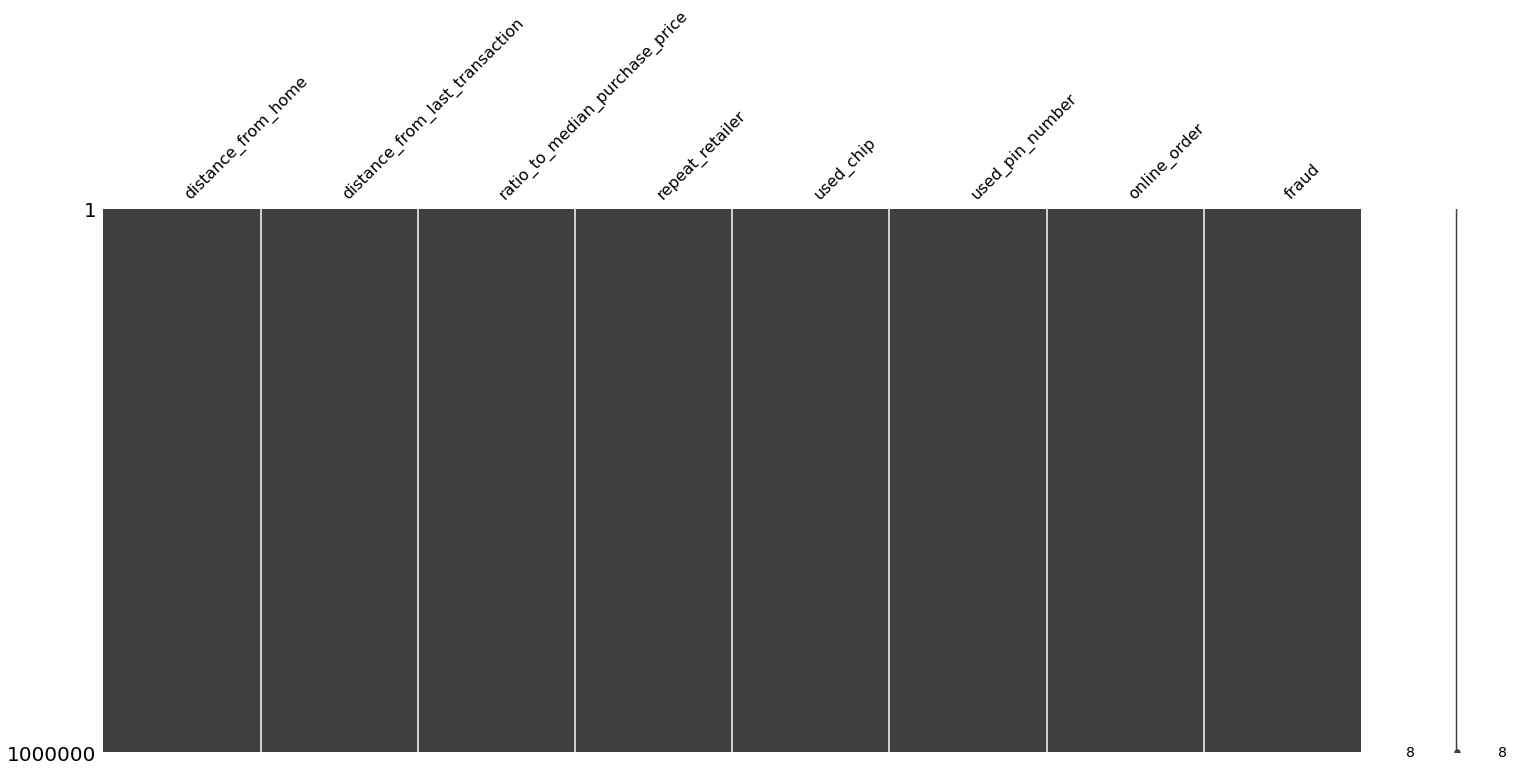

In [ ]:
# Verificamos la existencia de datos "Nan" gráficamente.
#============================================================================================================

msno.matrix(df_fraude_creditcard)

A partir de este gráfico, podemos vemos que el dataset no tiene valores Nan, ya que no hay espacios blancos. 

Tener en cuenta que:
    
    Blanco: sin valores o Nan
    Negro: con valores

In [ ]:
# Analizamos el tipo de dato
#============================================================================================================

df_fraude_creditcard.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [ ]:
# Analizamos los valores unicos de las variables que en principio parecen tener datos binarios
#============================================================================================================

df_fraude_creditcard['repeat_retailer'].unique()

array([1., 0.])

In [ ]:
df_fraude_creditcard['used_chip'].unique()

array([1., 0.])

In [ ]:
df_fraude_creditcard['used_pin_number'].unique()

array([0., 1.])

In [ ]:
df_fraude_creditcard['online_order'].unique()

array([0., 1.])

In [ ]:
df_fraude_creditcard['fraud'].unique()

array([0., 1.])

**Conclusión del análisis:** Tal como se puede ver en las variables analizadas, todas ellas tienen datos binarios. Podrían transformarse en variables categóricas, pero por ahora mantendremos su tipo para un mejor análisis.

In [ ]:
# Realizamos un análisis de las principales medidas estadísticas 
#============================================================================================================

df_fraude_creditcard.describe().round(2)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.0,1000000.00,1000000.00
mean,26.63,5.04,1.82,0.88,0.35,0.1,0.65,0.09
std,65.39,25.84,2.80,0.32,0.48,0.3,0.48,0.28
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,3.88,0.30,0.48,1.00,0.00,0.0,0.00,0.00
50%,9.97,1.00,1.00,1.00,0.00,0.0,1.00,0.00
75%,25.74,3.36,2.10,1.00,1.00,0.0,1.00,0.00
max,10632.72,11851.10,267.80,1.00,1.00,1.0,1.00,1.00


**Conclusión del análisis:** Se puede observar que en las 2 primeras variables, hay mucha distancia entre el mínimo y el máximo. En este sentido, la mediana o el 2° quartil están muy alejado del valor máximo, lo que en prinicpio nos que pueden existir muchos outsider.   